# **Trabalho Prático: Previsão de Incidentes Rodoviários**

## Descrição do Problema

## Preparação do programa

### Bibliotecas e Funções

In [64]:
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree

#Modelo a usar
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

#Métricas de qualidade
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### Leitura dos datasets

In [2]:
dftrain = pd.read_csv('training_data.csv')
dftest = pd.read_csv('test_data.csv')

## Exploração dos dados

Para esta etapa do trabalho, também se utilizou as informações obtidas no website "kaggle", tais como:
* Tipos dos atributos
* Conteúdo dos atributos
* Missing values

### Visualização dos dados

In [3]:
dftrain.shape

(5000, 13)

In [4]:
dftrain.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [5]:
dftrain.tail()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
4995,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-13 00:00,DARK,13.0,1021.0,56.0,0.0,0.0,Sem Chuva,High
4996,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-06 14:00,LIGHT,19.0,1017.0,68.0,0.0,0.0,Sem Chuva,None
4997,Guimaraes,UNDEFINED,0,",",2021-03-18 03:00,DARK,13.0,1023.0,47.0,2.0,0.0,Sem Chuva,None
4998,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-11-02 06:00,DARK,12.0,1014.0,93.0,2.0,0.0,Sem Chuva,None
4999,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-12-20 02:00,DARK,12.0,1018.0,77.0,3.0,0.0,Sem Chuva,None


### Informações sobre os diferentes atributos

In [6]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [7]:
dftrain.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


### Missing Values

In [8]:
dftrain.isna().any()

city_name             False
magnitude_of_delay    False
delay_in_seconds      False
affected_roads         True
record_date           False
luminosity            False
avg_temperature       False
avg_atm_pressure      False
avg_humidity          False
avg_wind_speed        False
avg_precipitation     False
avg_rain              False
incidents             False
dtype: bool

In [9]:
dftrain.isna().sum()

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
incidents              0
dtype: int64

### Matriz de Correlação

<AxesSubplot:>

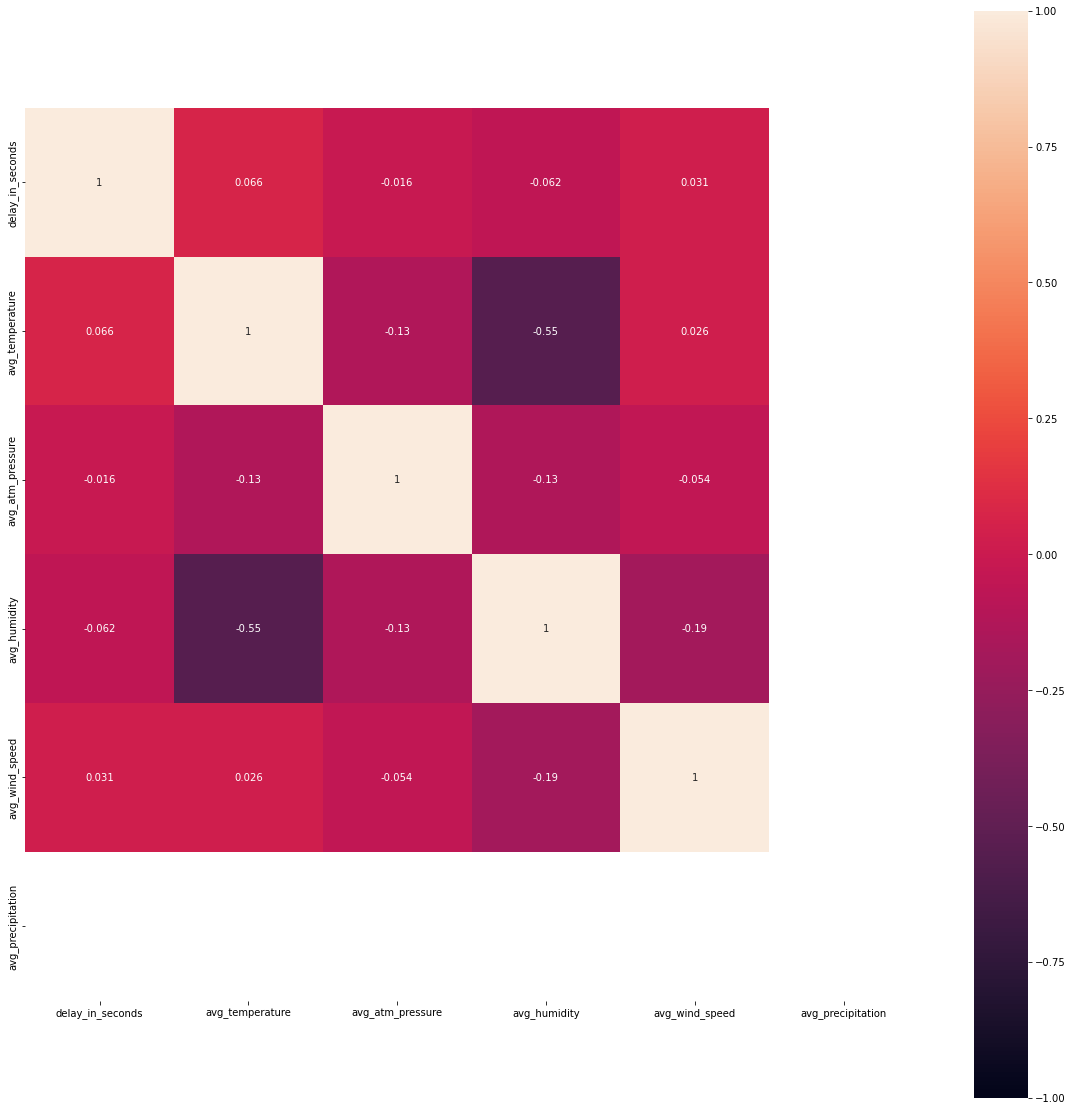

In [10]:
corr_matrix = dftrain.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

### Pairplot

### Histogramas

## Preparação dos dados

### Apagar atributos

In [11]:
# Era sempre Guimarães em todos os registos, logo não tem impacto nenhum
dftrain = dftrain.drop(["city_name"], axis=1)
dftest = dftest.drop(["city_name"], axis=1)

# Era sempre 0 em todos os registos, logo não tem impacto nenhum
dftrain = dftrain.drop(["avg_precipitation"], axis=1)
dftest = dftest.drop(["avg_precipitation"], axis=1)

# Era sempre 0 em todos os registos, logo não tem impacto nenhum
#dftrain = dftrain.drop(["delay_in_seconds"], axis=1)
#dftest = dftest.drop(["delay_in_seconds"], axis=1)

### Alteração do tipo dos atributos

#### Label Encoding

In [12]:
label_encoder = preprocessing.LabelEncoder()

#Train
dftrain['magnitude_of_delay']= label_encoder.fit_transform(dftrain['magnitude_of_delay'])
dftrain['luminosity']= label_encoder.fit_transform(dftrain['luminosity'])
dftrain['avg_rain']= label_encoder.fit_transform(dftrain['avg_rain'])

#Test
dftest['magnitude_of_delay']= label_encoder.fit_transform(dftest['magnitude_of_delay'])
dftest['luminosity']= label_encoder.fit_transform(dftest['luminosity'])
dftest['avg_rain']= label_encoder.fit_transform(dftest['avg_rain'])

#### Atributo affected_roads

##### Quantidade de vezes que estradas aparecem

In [13]:
dftrain['affected_roads']  = dftrain['affected_roads'].apply(lambda x: 0 if pd.isnull(x) else len(list(filter(None, x.split(',')))))
dftest['affected_roads']   = dftest['affected_roads'].apply(lambda x: 0 if pd.isnull(x) else len(list(filter(None, x.split(',')))))

##### Quantidade de vezes que cada tipo de estrada aparece

#### String to Date

In [14]:
# TRAIN
dftrain['record_date'] = pd.to_datetime(dftrain['record_date'], format='%Y-%m-%d %H:%M')

# Este dataset é apenas num ano, logo será igual para todos os registos
dftrain['record_month'] = dftrain['record_date'].dt.month
dftrain['record_day'] = dftrain['record_date'].dt.day
dftrain['record_hour'] = dftrain['record_date'].dt.hour

# Já não precisamos do record_date para nada
dftrain = dftrain.drop(["record_date"], axis=1)

# TEST
dftest['record_date'] = pd.to_datetime(dftest['record_date'], format='%Y-%m-%d %H:%M')

# Este dataset é apenas num ano, logo será igual para todos os registos
dftest['record_month'] = dftest['record_date'].dt.month
dftest['record_day'] = dftest['record_date'].dt.day
dftest['record_hour'] = dftest['record_date'].dt.hour

# Já não precisamos do record_date para nada
dftest = dftest.drop(["record_date"], axis=1)

#### Tipo do atributo dependente

In [15]:
dftrain['incidents'] = pd.Categorical(dftrain['incidents'])

## Modelos

### Preparação prévia

#### Separação da variável dependente

In [16]:
X_train = dftrain.drop(['incidents'], axis=1)
Y_train = dftrain['incidents'].to_frame()

#### Separação entre dataframe de teste e de treino

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

### Treino dos modelos

#### Decision Tree

In [18]:
clf = DecisionTreeClassifier(random_state=123)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=123)

### Previsões

In [19]:
predictions = clf.predict(X_test)

## Métricas de Qualidade

#### Accuracy

In [20]:
print(" Accuracy: " + str( accuracy_score(Y_test, predictions)))

 Accuracy: 0.9136


#### Médias de métricas por peso

* __micro__: Calculate metrics globally by counting the total true positives, false negatives and false positives. 
* __macro__: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
* __weighted__: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

In [21]:
print("Precision: " + str(precision_score(Y_test, predictions, average= 'weighted')))
print("   Recall: " + str(recall_score(Y_test, predictions, average= 'weighted')))
print(" F1-Score: " + str(f1_score(Y_test, predictions, average= 'weighted')))

Precision: 0.9143398239264848
   Recall: 0.9136
 F1-Score: 0.9137721036793686


#### Métricas por Label

In [22]:
from tabulate import tabulate

# assign data
mydata = [
    ["Precision"] + list(precision_score(Y_test, predictions, average= None)),
    ["Recall"] + list(recall_score(Y_test, predictions, average= None)),
    ["F1-Score"] + list(f1_score(Y_test, predictions, average= None))
]
 
# create header
head = ["Metric"] + list(dftrain['incidents'].cat.categories.values)
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+-----------+----------+----------+----------+----------+-------------+
| Metric    |     High |      Low |   Medium |     None |   Very_High |
+===========+==========+==========+==========+==========+=============+
| Precision | 0.898039 | 0.881081 | 0.788079 | 0.982592 |    0.866197 |
+-----------+----------+----------+----------+----------+-------------+
| Recall    | 0.864151 | 0.862434 | 0.826389 | 0.982592 |    0.911111 |
+-----------+----------+----------+----------+----------+-------------+
| F1-Score  | 0.880769 | 0.871658 | 0.80678  | 0.982592 |    0.888087 |
+-----------+----------+----------+----------+----------+-------------+


### Cross Validation

Cross validation irá fazer vários segmentos e testá-los. Se houver um desvio padrão mt grande entre eles, isso quer dizer que existe over-fitting

In [23]:
scores = cross_val_score(clf, X_train, Y_train, cv=10)
print(scores)
print("Média: " + str(scores.mean()))
print("desvio padrão: " + str(scores.std()))

[0.87733333 0.88533333 0.92533333 0.92533333 0.94133333 0.88
 0.936      0.912      0.896      0.91466667]
Média: 0.9093333333333333
desvio padrão: 0.022183076632624466


## Escrita no Ficheiro

Para fazer uma submissão é preciso meter o seguinte código em modo codigo e nao raw. Tambem é preciso ir a secção Separação entre dataframe de teste e de treino e fazer toggle do que é código e o que é raw

In [24]:
actual_predictions = clf.predict(dftest) # Predictions on the test set
actual_predictions = pd.DataFrame(actual_predictions, columns=['incidents']) # Convert to dataframe 
actual_predictions.head(10)

,incidents
0,Very_High
1,None
2,None
3,Low
4,None
5,Very_High
6,Very_High
7,None
8,High
9,Medium


In [25]:
actual_predictions.reset_index(inplace=True)
actual_predictions['index'] = actual_predictions['index'].transform(lambda x: int(x)+1)
print(actual_predictions.head(10))
actual_predictions.to_csv('submission.csv', sep=',', header=['RowId','Incidents'], index=False, mode='w')

   index  incidents
0      1  Very_High
1      2       None
2      3       None
3      4        Low
4      5       None
5      6  Very_High
6      7  Very_High
7      8       None
8      9       High
9     10     Medium


## SVM

Now its time to train a Support Vector Machine Classifier.

In [26]:
from sklearn.svm import SVC

In [39]:
model = SVC(random_state=2022)

In [46]:
model.fit(X_train, Y_train)

c:\Users\vasco\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=2022)

In [47]:
predictions = model.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, plot_confusion_matrix

c:\Users\vasco\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


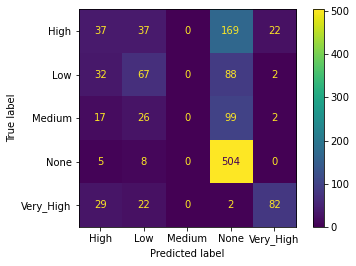

In [49]:
plot_confusion_matrix(model, X_test, Y_test)

In [44]:
classification_report(Y_test, predictions)

c:\Users\vasco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vasco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vasco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n        High       0.31      0.14      0.19       265\n         Low       0.42      0.35      0.38       189\n      Medium       0.00      0.00      0.00       144\n        None       0.58      0.97      0.73       517\n   Very_High       0.76      0.61      0.67       135\n\n    accuracy                           0.55      1250\n   macro avg       0.41      0.42      0.40      1250\nweighted avg       0.45      0.55      0.47      1250\n'

## Gridsearch Practice

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

In [ ]:
grid.fit(X_train, Y_train)

In [ ]:
grid.best_params_

c:\Users\vasco\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


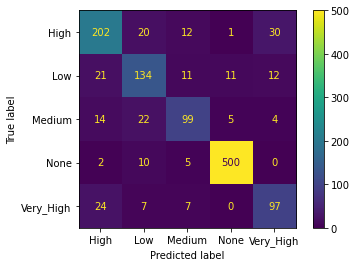

In [55]:
grid.best_estimator_
plot_confusion_matrix(grid, X_test, Y_test)

In [56]:
classification_report(Y_test, grid.predict(X_test))

'              precision    recall  f1-score   support\n\n        High       0.77      0.76      0.77       265\n         Low       0.69      0.71      0.70       189\n      Medium       0.74      0.69      0.71       144\n        None       0.97      0.97      0.97       517\n   Very_High       0.68      0.72      0.70       135\n\n    accuracy                           0.83      1250\n   macro avg       0.77      0.77      0.77      1250\nweighted avg       0.83      0.83      0.83      1250\n'

## Pre-pruning

In [57]:
print(clf.get_depth())

14


In [58]:
print(clf.get_n_leaves())

290


In [103]:
max_depth = 24

In [62]:
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import ParameterGrid

In [88]:
full_tree = DecisionTreeClassifier(random_state=2022)
full_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=2022)

In [102]:
print(full_tree.get_depth())

14


In [101]:
print(full_tree.get_n_leaves())

289


In [100]:
EPS = np.finfo(np.float64).eps

min_samples_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=2022),
    scoring=make_scorer(accuracy_score),
    param_grid= ParameterGrid(
        {'min_samples_split':[[min_samples_split] for min_samples_split in np.arange(EPS, 1, 0.025)]}),
)

In [99]:
min_samples_leaf_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=2022),
    scoring=make_scorer(accuracy_score),
    param_grid= ParameterGrid(
        {'min_samples_leaf':[[min_samples_leaf] for min_samples_leaf in np.arange(0.000001, 0.5, 0.025)]}),
)

In [104]:
max_depth_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=2022),
    scoring=make_scorer(accuracy_score),
    param_grid= ParameterGrid(
        {'max_depth':[[max_depth] for max_depth in range(1, max_depth + 1)]}),
)

In [ ]:
ccp_alphas = full_tree.cost_complexity_pruning_path(X_train, Y_train)["ccp_alphas"]
ccp_alphas_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=2022),
    scoring=make_scorer(accuracy_score),
    param_grid= ParameterGrid({'ccp_alpha':[[alpha] for alpha in ccp_alphas]}),
)

## Isto fui buscar a net

In [114]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [115]:
std_slc = StandardScaler()

In [116]:
pca = decomposition.PCA()

In [117]:
dec_tree = tree.DecisionTreeClassifier()

In [118]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                       ('pca', pca),
                           ('dec_tree', dec_tree)])

In [121]:
n_components = list(range(1,X_train.shape[1]+1,1))

In [122]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

In [123]:
parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

In [126]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, Y_train)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12]})

In [127]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 12
Best Number Of Components: 12

DecisionTreeClassifier(criterion='entropy', max_depth=12)
